In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

Thu Mar 23 12:49:08 PDT 2023


In [2]:
# from vivarium_research_prl import datatypes

# PRL V&V - Decennial Census Observer
Systematic validation

In [3]:
%cd /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_14_16_41_22
!ls -halt

/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_14_16_41_22
total 14G
drwxrwsr-x  2 albrja IHME-Simulationscience 4.0K Mar 22 16:44 .
-rw-r--r--  1 albrja IHME-Simulationscience  59M Mar 15 10:01 wic_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 1.5G Mar 15 10:01 tax_dependents_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.8G Mar 15 09:57 tax_w2_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 4.1G Mar 15 09:56 tax_1040_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 192M Mar 15 09:48 social_security_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience  35M Mar 15 09:36 household_survey_observer_cps.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.7M Mar 15 09:36 household_survey_observer_acs.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 638M Mar 15 09:36 decennial_census_observer.csv.bz2
drwx

In [41]:
%%time

df = pd.read_csv('decennial_census_observer.csv.bz2', low_memory=False, #dtype='category',
                 nrows=10_000_000
                )

CPU times: user 1min 34s, sys: 6.08 s, total: 1min 40s
Wall time: 1min 40s


In [42]:
df

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
1,M,2020,77566.0,Standard,2284_1,2284_-1,Latino,1983-09-02,Ticas,Melissa,36.580000,adams st,sour lake,2284_-1,Opp-sex spouse,Female,NaN,7136,TX
2,L,2020,77566.0,Standard,2284_2,2284_0,Latino,2007-10-04,Ticas,Martin,12.492590,adams st,sour lake,2284_1,Biological child,Male,NaN,7136,TX
3,L,2020,77566.0,Standard,2284_3,2284_0,Latino,2011-11-09,Ticas,Maya,8.392918,adams st,sour lake,2284_1,Biological child,Female,NaN,7136,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999996,N,2030,36207.0,Standard,4344_856982,4344_856980,Black,2006-05-22,Eanes,Ayden,23.826587,n vail ave,birmingham,4344_856981,Reference person,Male,NaN,217,AL
9999997,F,2030,80017.0,Standard,4344_856984,4344_-1,White,1947-12-27,Smith,Jenny,82.229716,dunlavin gln rd,dumont,4344_-1,Reference person,Female,NaN,206,CO
9999998,R,2030,34953.0,Standard,4344_856985,4344_-1,White,1955-03-08,Supeck,Betty,75.034620,tranquilla dr,pensacola,4344_-1,Reference person,Female,NaN,343,FL
9999999,D,2030,68333.0,Standard,4344_856986,4344_-1,Black,1959-01-09,Supeck,Ed,71.193217,stillwell avenue,gretna,4344_-1,Reference person,Male,NaN,233,NE


In [43]:
df.iloc[0].to_dict()

{'middle_initial': 'M',
 'census_year': 2020,
 'zipcode': 77566.0,
 'housing_type': 'Standard',
 'simulant_id': '2284_0',
 'guardian_1': '2284_-1',
 'race_ethnicity': 'Latino',
 'date_of_birth': '1982-02-09',
 'last_name': 'Ticas',
 'first_name': 'Michael',
 'age': 38.14174167482581,
 'street_name': 'adams st',
 'city': 'sour lake',
 'guardian_2': '2284_-1',
 'relation_to_household_head': 'Reference person',
 'sex': 'Male',
 'unit_number': nan,
 'street_number': '7136',
 'state': 'TX'}

## Known (potential) VV issues
- Do zipcode and age need to be floats? And does 'age' need so many decimal digits?

## Checking data type

In [39]:
df.dtypes

middle_initial     object
census_year         int64
zipcode           float64
housing_type       object
                   ...   
sex                object
unit_number        object
street_number      object
state              object
Length: 19, dtype: object

## Checking Census Year

In [44]:
df.census_year.nunique() # Only census is from 2020 

2

## Checking names 
- All 26 letters should be represented as a simulant middle initial
- Most common and least common first and last names should be as expected
- Most common and least common first and last names stratified by race/ethnicity should be as expected

In [20]:
df.middle_initial.nunique()  # expect 26

26

In [21]:
assert df.middle_initial.nunique()  == 26, 'expect all 26 letters to appear as a middle initial for somebody'

In [22]:
df.first_name.value_counts()

James      1424
John       1397
Michael    1215
Robert     1207
           ... 
Jaya          1
Fawn          1
Oralia        1
Coco          1
Name: first_name, Length: 5318, dtype: int64

[]

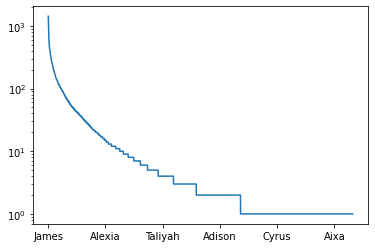

In [23]:
df.first_name.value_counts().plot()
plt.semilogy()

## Checking age distribution
- no weird spikes

<AxesSubplot:>

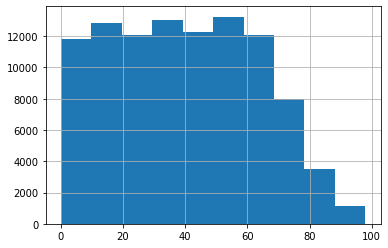

In [29]:
df.age.hist()

In [32]:
df

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
1,M,2020,77566.0,Standard,2284_1,2284_-1,Latino,1983-09-02,Ticas,Melissa,36.580000,adams st,sour lake,2284_-1,Opp-sex spouse,Female,NaN,7136,TX
2,L,2020,77566.0,Standard,2284_2,2284_0,Latino,2007-10-04,Ticas,Martin,12.492590,adams st,sour lake,2284_1,Biological child,Male,NaN,7136,TX
3,L,2020,77566.0,Standard,2284_3,2284_0,Latino,2011-11-09,Ticas,Maya,8.392918,adams st,sour lake,2284_1,Biological child,Female,NaN,7136,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,A,2020,8003.0,Standard,2284_100087,2284_100085,Black,2013-03-10,Petersen,Jace,7.060494,pleasant avenue south,elizabeth,2284_-1,Adopted child,Male,NaN,16117,NJ
99997,J,2020,54115.0,Standard,2284_100088,2284_-1,White,1998-05-02,Porter,Joshua,21.915779,nicholas pkwy e,lac du flambeau,2284_-1,Reference person,Male,NaN,6044,WI
99998,E,2020,54115.0,Standard,2284_100089,2284_-1,White,1993-06-30,Porter,Samantha,26.753895,nicholas pkwy e,lac du flambeau,2284_-1,Opp-sex spouse,Female,NaN,6044,WI
99999,J,2020,19055.0,Standard,2284_100090,2284_-1,Black,1975-01-19,Mcfadden,Donald,45.199853,minutemen causewy,rutherford,2284_-1,Reference person,Male,NaN,20627,PA


## Checking household structure distribution
- Group quarters population should be about 3% of the total population 
- Each household should have a reference person and at most one spouse/partner 
- No child should be listed as a household reference person 
- 23% of female reference people and 5% of male reference people should be without a listed spouse  

In [33]:
df_refs = df[df.relation_to_household_head == 'Reference person']
df_refs

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
4,M,2020,22209.0,Standard,2284_4,2284_-1,White,1960-01-28,Sayah,Randy,60.175473,north burgher avenue,leesburg,2284_-1,Reference person,Male,NaN,10233,VA
7,M,2020,75024.0,Standard,2284_7,2284_-1,Multiracial or Other,1984-07-20,Kohtz,Michael,35.700136,commonwealth avnue,houston,2284_-1,Reference person,Male,NaN,1312,TX
10,D,2020,8721.0,Standard,2284_10,2284_-1,Latino,1960-01-11,Reiter,Keith,60.222370,e 72 st,brielle,2284_-1,Reference person,Male,NaN,427,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,W,2020,77547.0,Standard,2284_100082,2284_-1,Latino,1959-10-14,Aguiar,Deborah,60.466167,clove l,houston,2284_-1,Reference person,Female,NaN,2110,TX
99994,S,2020,8003.0,Standard,2284_100085,2284_-1,White,1963-08-20,Petersen,Michael,56.615854,pleasant avenue south,elizabeth,2284_-1,Reference person,Male,NaN,16117,NJ
99997,J,2020,54115.0,Standard,2284_100088,2284_-1,White,1998-05-02,Porter,Joshua,21.915779,nicholas pkwy e,lac du flambeau,2284_-1,Reference person,Male,NaN,6044,WI
99999,J,2020,19055.0,Standard,2284_100090,2284_-1,Black,1975-01-19,Mcfadden,Donald,45.199853,minutemen causewy,rutherford,2284_-1,Reference person,Male,NaN,20627,PA


<AxesSubplot:>

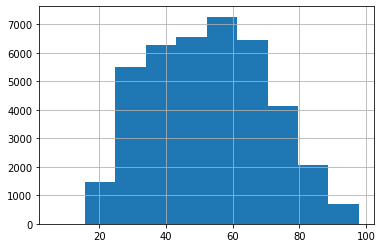

In [34]:
df_refs.age.hist()

In [35]:
df_refs.age.min()

6.560870302468784

## Checking geographic distributions
- All 50 states should be represented 
- Migration patterns should match what is expected

In [28]:
df.state.nunique() # How are there 51 states?

51

In [25]:
df.state.value_counts() # Looks like there are 51 states because Washington DC is counted as a state? 

CA    11555
TX     8471
FL     6230
NY     6022
      ...  
ND      204
DC      202
VT      190
WY      158
Name: state, Length: 51, dtype: int64

[]

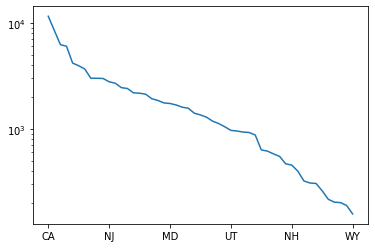

In [26]:
df.state.value_counts().plot()
plt.semilogy()

## Check fertility and mortality distributions
- New simulants should be added at the expected rate  
- 4% of birth events should be twins 
- Every newborn should be assigned at least 1 guardian 
- Simulants should be dying at the expected rate

## Checking physical address distributions
- Every person in a given household should have the same address 
- Zip code should match PUMA 
- Street should conform to typical expectations 